In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler

In [105]:
df = pd.read_csv(r'C:\SureVue\Bubble Point Project\Data\data for modeling+testing after eos 5.30.21.csv')

In [106]:
df.head()

,Unnamed: 0,Measured Shrinkage,Measured GOR,Measured Press,Shrink,GOR,Bubble_P,P,Px,T,...,C1_gas_out,CO2_gas_out,C2_gas_out,C3_gas_out,iC4_gas_out,C4_gas_out,iC5_gas_out,C5_gas_out,C6_gas_out,C7_gas_out
0,0,0.5595,654.6310,1176.0,0.75642561,733.0606605,1304.724609,1176.0,0.0001,335.927778,...,0.302369326,0.015727628,0.142132189,0.115492185,0.032212765,0.071390438,0.039030562,0.042945158,0.076710328,0.161412759
1,1,0.6114,630.6118,1174.0,0.759682627,723.9893465,1149.699007,1174.0,0.0001,328.150000,...,0.282913166,0.013637524,0.1490195,0.121314366,0.0332205,0.07292439,0.038929715,0.042290892,0.074655544,0.170606554
2,2,0.6531,652.9547,1168.0,0.793942904,624.5074844,1251.685874,1168.0,0.0001,344.261111,...,0.327980652,0.015367518,0.159718166,0.121752236,0.045967464,0.077899855,0.055031079,0.049880425,0.127942423,0.01812599
3,3,0.6809,590.6267,1145.0,0.79951924,596.0901995,1133.617127,1145.0,0.0001,340.927778,...,0.310942568,0.015716592,0.170036428,0.132616378,0.050053159,0.086689945,0.057381971,0.053428353,0.105620584,0.016989079
4,4,0.6877,616.8451,206.4,0.605932989,1101.758814,258.1477524,206.4,0.0001,282.483333,...,0.781012687,0.01723245,0.113061428,0.048898521,0.008957381,0.014436913,0.003782463,0.002851678,0.000790594,0.00011249


In [151]:
df = pd.read_csv(r'C:\SureVue\Bubble Point Project\Data\data for modeling+testing after eos 5.30.21.csv')
df = df.drop('Unnamed: 0', axis =1)
df = (df[df!='error'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

diff_gor = abs(df['Measured GOR'].values - df['GOR'].values) / df['Measured GOR'].values
diff_bubble_p = abs(df['Measured Press'].values - df['Bubble_P'].values) / df['Measured Press'].values

# Comparing All Data

In [152]:
df_cov = df[['Measured Shrinkage', 'Measured GOR', 'Measured Press', 'Shrink', 'GOR', 'Bubble_P', 
             'N2_In', 'C1_In']]
df_cov['Pct Diff GOR'] = abs(df['Measured GOR'].values - df['GOR'].values) / df['Measured GOR'].values
df_cov['Pct Diff Pb'] = abs(df['Measured Press'].values - df['Bubble_P'].values) / df['Measured Press'].values



# get rid of some outliers
df_cov['GOR'] = df_cov['GOR'].apply(lambda x: 'error' if x>2000 else x)
df_cov['Pct Diff GOR'] = df_cov['Pct Diff GOR'].apply(lambda x: 'error' if x>1 else x)
df_cov['Pct Diff Pb'] = df_cov['Pct Diff Pb'].apply(lambda x: 'error' if x>1 else x)
df_cov = df_cov.apply(pd.to_numeric, errors='coerce')
df_cov = df_cov.dropna()


<ipython-input-152-4688d12901f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov['Pct Diff GOR'] = abs(df['Measured GOR'].values - df['GOR'].values) / df['Measured GOR'].values
<ipython-input-152-4688d12901f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov['Pct Diff Pb'] = abs(df['Measured Press'].values - df['Bubble_P'].values) / df['Measured Press'].values
<ipython-input-152-4688d12901f5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [153]:
def heatmap(df):
    scaled_cov = abs(df.cov())
    plt.figure(figsize=(20,10))
    scaled_heatmap = sns.heatmap(scaled_cov, annot=True, linewidth=0.5, vmin=0, vmax=1)
    bottom, top = scaled_heatmap.get_ylim()
    scaled_heatmap.set_ylim(bottom + 0.5, top - 0.5)

### Covariance Matrix

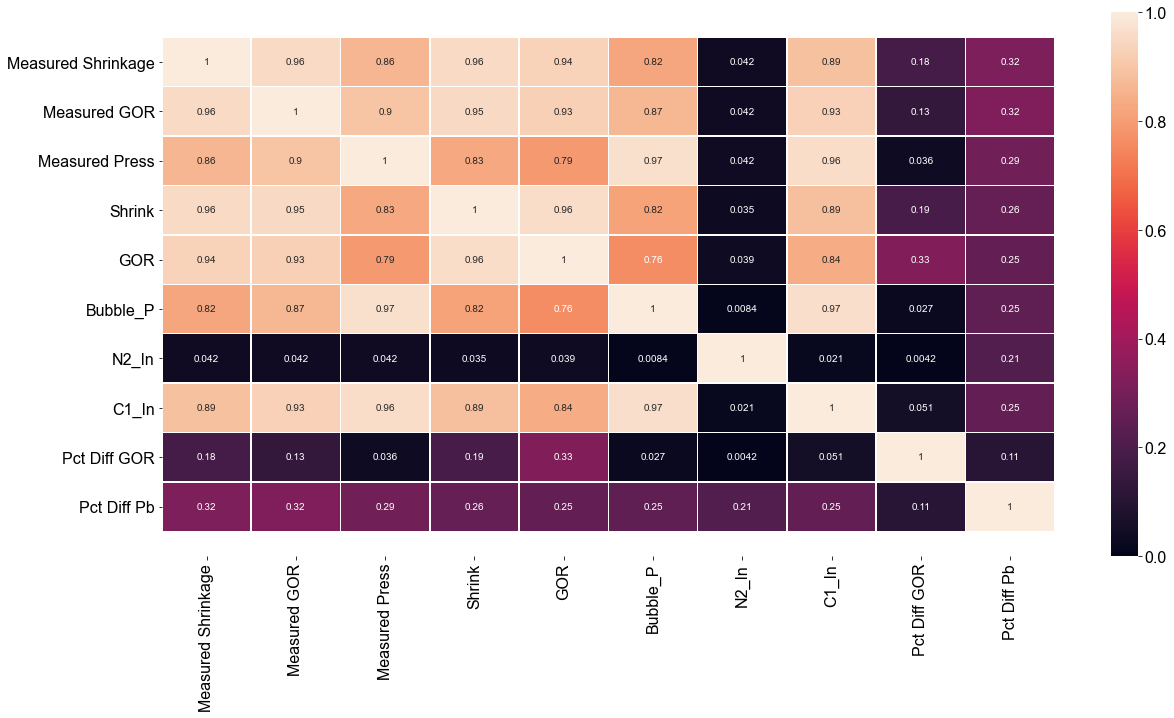

In [154]:
columns = df_cov.columns
df_scaled =StandardScaler().fit_transform(df_cov)
df_scaled = pd.DataFrame(df_scaled, columns = columns)

heatmap(df_scaled)

### Pairplots

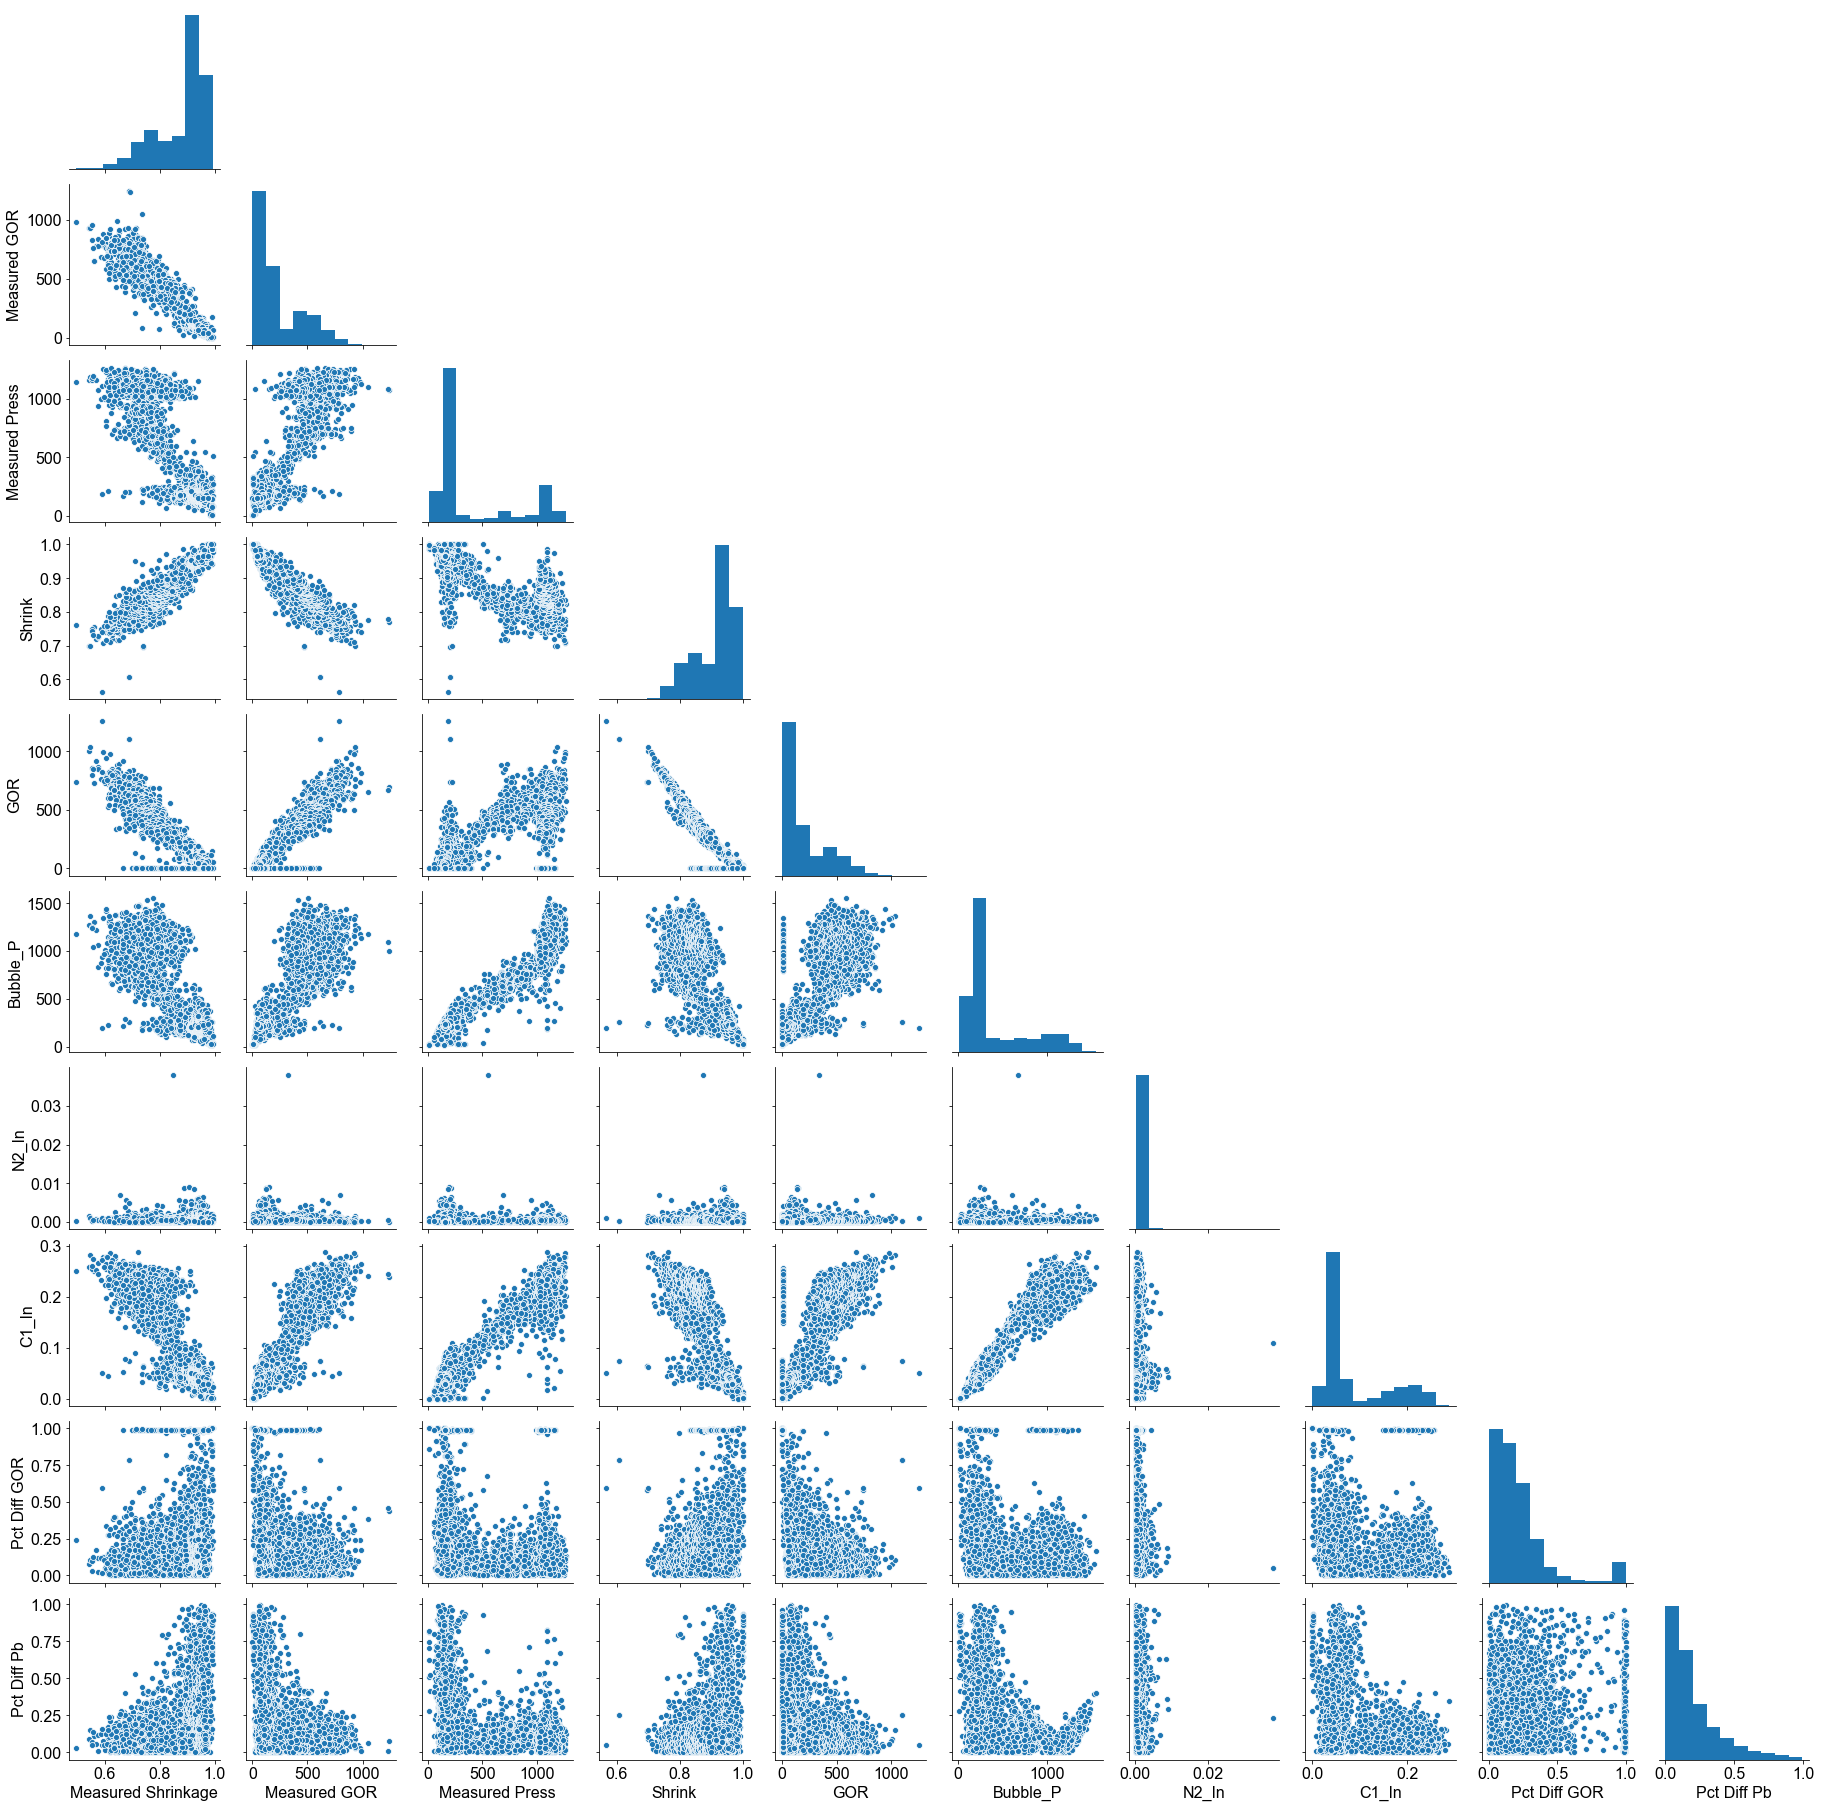

In [155]:
sns.pairplot(df_cov, corner=True)

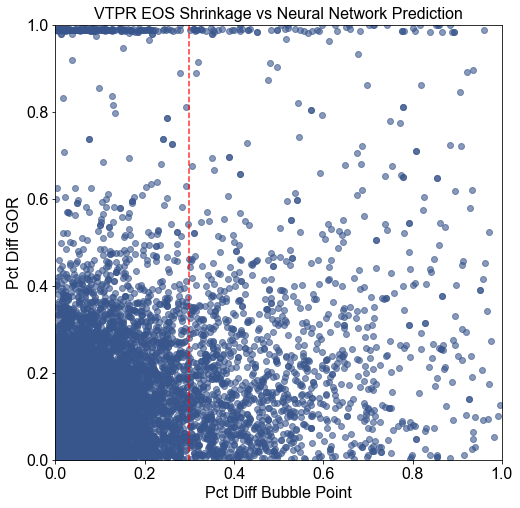

In [141]:
plt.figure(figsize=(8,8))
plt.scatter(df_cov['Pct Diff Pb'], df_cov['Pct Diff GOR'], alpha = 0.6, color='#39568CFF')
lims = [0, 1]
#plt.plot(lims, lims, color='black', alpha=0.8)
plt.plot([.3, .3], [0, 1], color='red', alpha=0.8, linestyle='--')
plt.xlim(lims)
plt.ylim(lims)
plt.title("VTPR EOS Shrinkage vs Neural Network Prediction")
plt.ylabel('Pct Diff GOR')
plt.xlabel('Pct Diff Bubble Point')
#plt.savefig(r'C:\Users\', dpi=(600), bbox_inches='tight')
plt.show()

# Comparing Bubble Point Error vs GOR Error

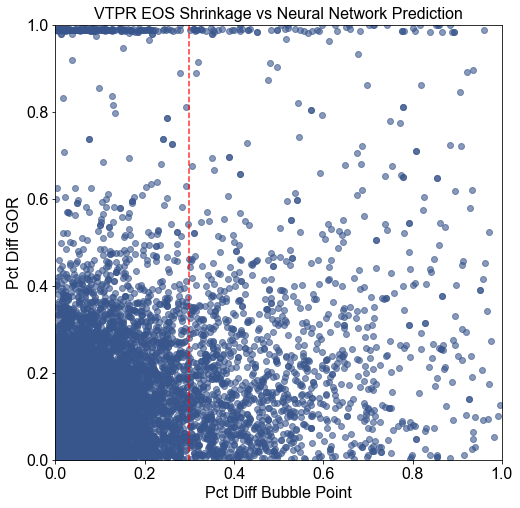

In [142]:
plt.figure(figsize=(8,8))
plt.scatter(df_cov['Pct Diff Pb'], df_cov['Pct Diff GOR'], alpha = 0.6, color='#39568CFF')
lims = [0, 1]
#plt.plot(lims, lims, color='black', alpha=0.8)
plt.plot([.3, .3], [0, 1], color='red', alpha=0.8, linestyle='--')
plt.xlim(lims)
plt.ylim(lims)
plt.title("VTPR EOS Shrinkage vs Neural Network Prediction")
plt.ylabel('Pct Diff GOR')
plt.xlabel('Pct Diff Bubble Point')
#plt.savefig(r'C:\Users\', dpi=(600), bbox_inches='tight')
plt.show()

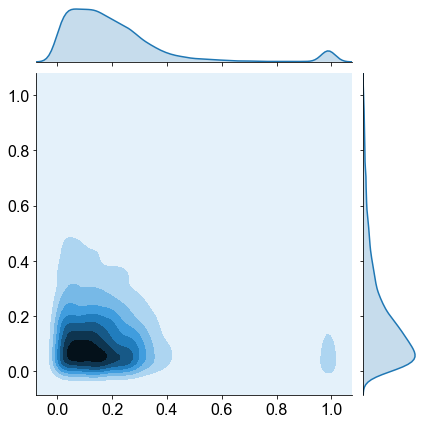

In [143]:
sns.jointplot(x=df_cov['Pct Diff GOR'].values, y=df_cov['Pct Diff Pb'].values, kind='kde')
plt.show()

# Breakdown GOR Ranges

In [144]:
df = pd.read_csv(r'C:\SureVue\Bubble Point Project\Data\data for modeling+testing after eos 5.30.21.csv')
df = df.drop('Unnamed: 0', axis =1)
df = (df[df!='error'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

df_p_0_50 = df
df_p_0_50['Measured GOR'] = df_p_0_50['Measured GOR'].apply(lambda x: 'error' if x>50 else x)
df_p_0_50 = df_p_0_50.apply(pd.to_numeric, errors='coerce')
df_p_0_50 = df_p_0_50.dropna()

diff_low_gor = abs(df_p_0_50['Measured GOR'].values - df_p_0_50['GOR'].values) / df_p_0_50['Measured GOR'].values
diff_low_bubble_p = abs(df_p_0_50['Measured Press'].values - df_p_0_50['Bubble_P'].values) / df_p_0_50['Measured Press'].values

df = pd.read_csv(r'C:\SureVue\Bubble Point Project\Data\data for modeling+testing after eos 5.30.21.csv')
df = df.drop('Unnamed: 0', axis =1)
df = (df[df!='error'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

df_p_50_100 = df
df_p_50_100['Measured GOR'] = df_p_50_100['Measured GOR'].apply(lambda x: 'error' if x>100 else x)
df_p_50_100 = df_p_50_100.apply(pd.to_numeric, errors='coerce')
df_p_50_100 = df_p_50_100.dropna()
df_p_50_100['Measured GOR'] = df_p_50_100['Measured GOR'].apply(lambda x: 'error' if x<50 else x)
df_p_50_100 = df_p_50_100.apply(pd.to_numeric, errors='coerce')
df_p_50_100 = df_p_50_100.dropna()

diff_low_mid_gor = abs(df_p_50_100['Measured GOR'].values - df_p_50_100['GOR'].values) / df_p_50_100['Measured GOR'].values
diff_low_mid_bubble_p = abs(df_p_50_100['Measured Press'].values - df_p_50_100['Bubble_P'].values) / df_p_50_100['Measured Press'].values

df = pd.read_csv(r'C:\SureVue\Bubble Point Project\Data\data for modeling+testing after eos 5.30.21.csv')
df = df.drop('Unnamed: 0', axis =1)
df = (df[df!='error'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

df_p_100_500 = df
df_p_100_500['Measured GOR'] = df_p_100_500['Measured GOR'].apply(lambda x: 'error' if x>500 else x)
df_p_100_500 = df_p_100_500.apply(pd.to_numeric, errors='coerce')
df_p_100_500 = df_p_100_500.dropna()
df_p_100_500['Measured GOR'] = df_p_100_500['Measured GOR'].apply(lambda x: 'error' if x<100 else x)
df_p_100_500 = df_p_100_500.apply(pd.to_numeric, errors='coerce')
df_p_100_500 = df_p_100_500.dropna()

diff_mid_gor = abs(df_p_100_500['Measured GOR'].values - df_p_100_500['GOR'].values) / df_p_100_500['Measured GOR'].values
diff_mid_bubble_p = abs(df_p_100_500['Measured Press'].values - df_p_100_500['Bubble_P'].values) / df_p_100_500['Measured Press'].values

df = pd.read_csv(r'C:\SureVue\Bubble Point Project\Data\data for modeling+testing after eos 5.30.21.csv')
df = df.drop('Unnamed: 0', axis =1)
df = (df[df!='error'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

df_p_500 = df
df_p_500['Measured GOR'] = df_p_500['Measured GOR'].apply(lambda x: 'error' if x>500 else x)
df_p_500 = df_p_500.apply(pd.to_numeric, errors='coerce')
df_p_500 = df_p_500.dropna()
df_p_500['Measured GOR'] = df_p_500['Measured GOR'].apply(lambda x: 'error' if x<100 else x)
df_p_500 = df_p_500.apply(pd.to_numeric, errors='coerce')
df_p_500 = df_p_500.dropna()

diff_high_gor = abs(df_p_500['Measured GOR'].values - df_p_500['GOR'].values) / df_p_500['Measured GOR'].values
diff_high_bubble_p = abs(df_p_500['Measured Press'].values - df_p_500['Bubble_P'].values) / df_p_500['Measured Press'].values


#df_p_100_500 = df
#df_p_500_plus = df



C:\Users\Preston\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [145]:
df_p_0_50.head()
print(len(df_p_0_50))

df_p_50_100.head()
print(len(df_p_50_100))

df_p_100_500.head()
print(len(df_p_100_500))

df_p_500.head()
print(len(df_p_500))

223
1768
3549
3549


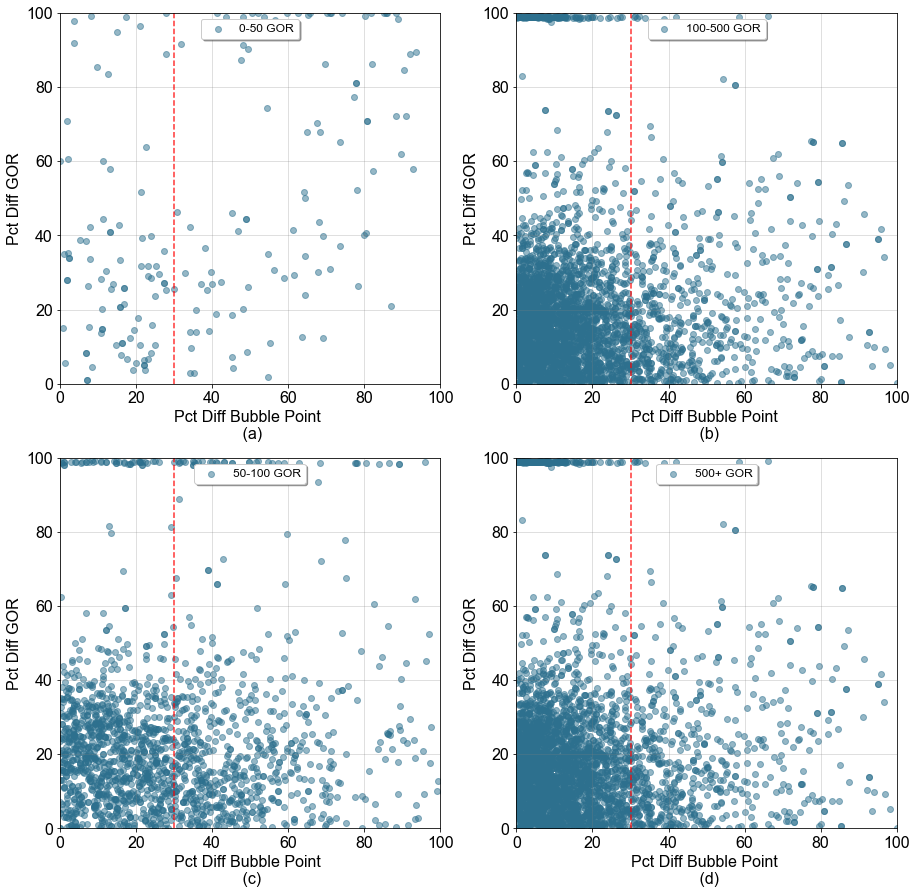

In [146]:
plt.rcParams['font.family'] = "Arial"
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

fig, axs = plt.subplots(2,2, figsize=(15,15))
lims = [0, 100]
lims2 = [0.6, 0.85]
color = '#2D708EFF'
alpha = 0.5
s = 20



axs[0,0].set(xlabel = "Pct Diff Bubble Point \n (a)", ylabel = "Pct Diff GOR")
axs[0,0].grid(color='grey', linestyle='-', linewidth=0.5, alpha = 0.5)
axs[0,0].scatter(diff_low_bubble_p*100, diff_low_gor*100,
            color='#2D708EFF', label = '0-50 GOR', alpha=0.5)
axs[0,0].legend(loc = 'upper center', fontsize = 'large', shadow=True)
axs[0,0].set_xlim(lims)
axs[0,0].set_ylim(lims)
_ = axs[0,0].plot([30, 30], [0, 100], color='red', alpha=0.8, linestyle='--')


axs[1,0].set(xlabel = "Pct Diff Bubble Point \n (c)", ylabel = "Pct Diff GOR")
axs[1,0].grid(color='grey', linestyle='-', linewidth=0.5, alpha = 0.5)
axs[1,0].scatter(diff_low_mid_bubble_p*100, diff_low_mid_gor*100,
            color='#2D708EFF', label = '50-100 GOR', alpha=0.5)
axs[1,0].legend(loc = 'upper center', fontsize = 'large', shadow=True)
axs[1,0].set_xlim(lims)
axs[1,0].set_ylim(lims)
_ = axs[1,0].plot([30, 30], [0, 100], color='red', alpha=0.8, linestyle='--')


axs[0,1].set(xlabel = "Pct Diff Bubble Point \n (b)", ylabel = "Pct Diff GOR")
axs[0,1].grid(color='grey', linestyle='-', linewidth=0.5, alpha = 0.5)
axs[0,1].scatter(diff_mid_bubble_p*100, diff_mid_gor*100,
            color='#2D708EFF', label = '100-500 GOR', alpha=0.5)
axs[0,1].legend(loc = 'upper center', fontsize = 'large', shadow=True)
axs[0,1].set_xlim(lims)
axs[0,1].set_ylim(lims)
_ = axs[0,1].plot([30, 30], [0, 100], color='red', alpha=0.8, linestyle='--')


axs[1,1].set(xlabel = "Pct Diff Bubble Point \n (d)", ylabel = "Pct Diff GOR")
axs[1,1].grid(color='grey', linestyle='-', linewidth=0.5, alpha = 0.5)
axs[1,1].scatter(diff_high_bubble_p*100, diff_high_gor*100,
            color='#2D708EFF', label = '500+ GOR', alpha=0.5)
axs[1,1].legend(loc = 'upper center', fontsize = 'large', shadow=True)
axs[1,1].set_xlim(lims)
axs[1,1].set_ylim(lims)
_ = axs[1,1].plot([30, 30], [0, 100], color='red', alpha=0.8, linestyle='--')

      

fig.savefig(r'C:\SureVue\Bubble Point Project\GOR_vs_BP_graph.png', dpi=(600), bbox_inches='tight')


## How Commonly Do Compromised Samples Occur?
### How Commonly Should They Occur?

In [147]:
Failing_samples = (df_cov['Pct Diff Pb']>0.3).sum()
print("Total Samples")
print(len(df_cov['Pct Diff Pb']))
print("Total Failing Samples")
print(Failing_samples)
print("Failing Percent")
print(round(Failing_samples/len(df_cov['Pct Diff Pb'])*100),"%")



Total Samples
6385
Total Failing Samples
1394
Failing Percent
22 %


#### Note: A Failing Percent of 22 seems high, but that matches up with what I was getting from the excel sheet as well

## Lets Compare The Fraction Of "Bad" GORs vs P_bubble 
#### Ranges: 30, 50, 70
#### Bad GOR: GOR % diff  > 50  (Arbitrary - could go back later and make assumptions about dataset - ex- 95% should pass)

In [158]:
GOR_vs_pb_df_30 = df_cov[['Pct Diff GOR', 'Pct Diff Pb']]
GOR_vs_pb_df_50 = df_cov[['Pct Diff GOR', 'Pct Diff Pb']]
GOR_vs_pb_df_70 = df_cov[['Pct Diff GOR', 'Pct Diff Pb']]

GOR_vs_pb_df_30['Pct Diff Pb'] = GOR_vs_pb_df_30['Pct Diff Pb'].apply(lambda x: 'error' if x>.3 else x)
GOR_vs_pb_df_30 = GOR_vs_pb_df_30.apply(pd.to_numeric, errors='coerce')
GOR_vs_pb_df_30 = GOR_vs_pb_df_30.dropna()

GOR_vs_pb_df_50['Pct Diff Pb'] = GOR_vs_pb_df_50['Pct Diff Pb'].apply(lambda x: 'error' if x>.5 else x)
GOR_vs_pb_df_50 = GOR_vs_pb_df_50.apply(pd.to_numeric, errors='coerce')
GOR_vs_pb_df_50 = GOR_vs_pb_df_50.dropna()

GOR_vs_pb_df_70['Pct Diff Pb'] = GOR_vs_pb_df_70['Pct Diff Pb'].apply(lambda x: 'error' if x>.7 else x)
GOR_vs_pb_df_70 = GOR_vs_pb_df_70.apply(pd.to_numeric, errors='coerce')
GOR_vs_pb_df_70= GOR_vs_pb_df_70.dropna()

<ipython-input-158-9d4d54d461e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOR_vs_pb_df_30['Pct Diff Pb'] = GOR_vs_pb_df_30['Pct Diff Pb'].apply(lambda x: 'error' if x>.3 else x)
<ipython-input-158-9d4d54d461e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOR_vs_pb_df_50['Pct Diff Pb'] = GOR_vs_pb_df_50['Pct Diff Pb'].apply(lambda x: 'error' if x>.5 else x)
<ipython-input-158-9d4d54d461e9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [164]:
failed_gor_pb30 = (GOR_vs_pb_df_30['Pct Diff GOR']>0.5).sum()
print("Failed Samples at 30% pb")
print(round(failed_gor_pb30/len(GOR_vs_pb_df_30['Pct Diff GOR'])*100,4),"%")
print(len(GOR_vs_pb_df_30['Pct Diff GOR']))
print(failed_gor_pb30)

failed_gor_pb50 = (GOR_vs_pb_df_50['Pct Diff GOR']>0.5).sum()
print("Failed Samples at 50% pb")
print(round(failed_gor_pb50/len(GOR_vs_pb_df_50['Pct Diff GOR'])*100,4),"%")

failed_gor_pb70 = (GOR_vs_pb_df_70['Pct Diff GOR']>0.5).sum()
print("Failed Samples at 70% pb")
print(round(failed_gor_pb70/len(GOR_vs_pb_df_70['Pct Diff GOR'])*100, 4),"%")

Failed Samples at 30% pb
5.6502 %
4991
282
Failed Samples at 50% pb
5.8501 %
Failed Samples at 70% pb
6.3572 %


# Bubble Point QC - Worse Than Nothing?

# Testing Anomalous Nitrogen Data Vs GOR